In [13]:
!pip install gensim



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\false\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [15]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798075914382935), ('dogs', 0.8344309329986572), ('pet', 0.7449565529823303), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063689231873), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471933126449585), ('rabbit', 0.6468629240989685)]
0.8798075


Part 1a

In [16]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

food = model['food']

print(model.most_similar('food'))

#It does make sense, these are all words that can be related to or used to speak about food. They're not directly the same but they have very close meanings or relations

[('foods', 0.7469059824943542), ('supplies', 0.7264690399169922), ('products', 0.7225049138069153), ('meat', 0.7138239145278931), ('supply', 0.6732637882232666), ('feed', 0.670415461063385), ('medicines', 0.6687098741531372), ('meals', 0.6630423069000244), ('coffee', 0.6627735495567322), ('goods', 0.6610530614852905)]


In [17]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827142715454102), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665560603141785), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.6407975554466248), ('le', 0.6403627395629883), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.4533277451992035), ('non-arabs', 0.45208775997161865), ('amerindians', 0.4478239417076111), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921766877174377), ('cats', 0.8814381957054138), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835323572158813), ('pet', 0.6792975664138794), ('horses', 0.6774963736534119), ('pigs', 0.6755765676498413), ('animal', 0.6683687567710876)]


In [18]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102038621902466), ('miscarry', 0.5550355911254883), ('lactating', 0.5421728491783142), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215138852596283), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.4072844088077545), ('technicals', 0.40608730912208557), ('allardyce', 0.4018688499927521), ('boss', 0.4010736346244812), ('rangers', 0.39962294697761536), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208152770996),
 ('nurse', 0.7757078409194946),
 ('physician', 0.7128060460090637),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793615818023682),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [19]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

gender_vector = model["person"] - model["gender"]

doctor_bias = model["doctor"] + gender_vector
nurse_bias = model["nurse"] + gender_vector
teacher_bias = model["teacher"] + gender_vector
engineer_bias = model["engineer"] + gender_vector
scientist_bias = model["scientist"] + gender_vector

print("Doctor:", model.most_similar(doctor_bias))
print("Nurse:", model.most_similar(nurse_bias))
print("Teacher:", model.most_similar(teacher_bias))
print("Engineer:", model.most_similar(engineer_bias))
print("Scientist:", model.most_similar(scientist_bias))


# I tried using person - gender to extract the specifically gender based meanings from each word. However, it still returned male pronouns or male-specific terms (man, father, him, brother, he). This definitely shows a bias in the data, I think the most interesting would be doctor because it includes brother and father, why the familial tie?

Doctor: [('doctor', 0.7580808401107788), ('person', 0.6636722087860107), ('man', 0.6084058880805969), ('friend', 0.6007109880447388), ('physician', 0.5990281105041504), ('patient', 0.5803568363189697), ('him', 0.5655670166015625), ('surgeon', 0.5642884969711304), ('father', 0.5460103750228882), ('brother', 0.5389922857284546)]
Nurse: [('nurse', 0.6979475021362305), ('doctor', 0.6580735445022583), ('person', 0.6076294779777527), ('physician', 0.5883259773254395), ('surgeon', 0.5795935392379761), ('friend', 0.5764024257659912), ('patient', 0.5761663913726807), ('sick', 0.5705106854438782), ('dentist', 0.5622962117195129), ('man', 0.555152952671051)]
Teacher: [('teacher', 0.6919305324554443), ('person', 0.6760188341140747), ('friend', 0.6589458584785461), ('father', 0.6106342077255249), ('man', 0.610599935054779), ('doctor', 0.5941383242607117), ('servant', 0.5791506171226501), ('uncle', 0.578798770904541), ('master', 0.5716139078140259), ('he', 0.5669278502464294)]
Engineer: [('engineer'

Part 2: Visualization and Embeddings in Space

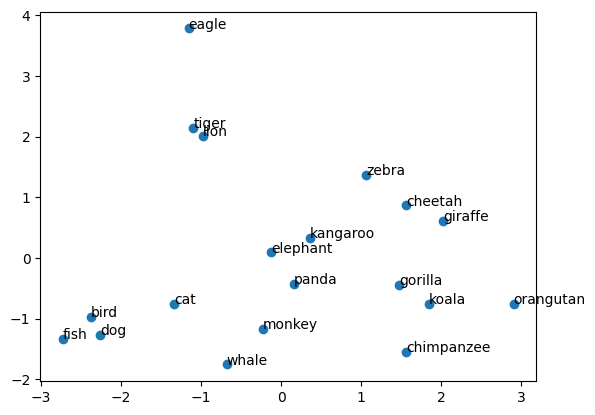

In [20]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

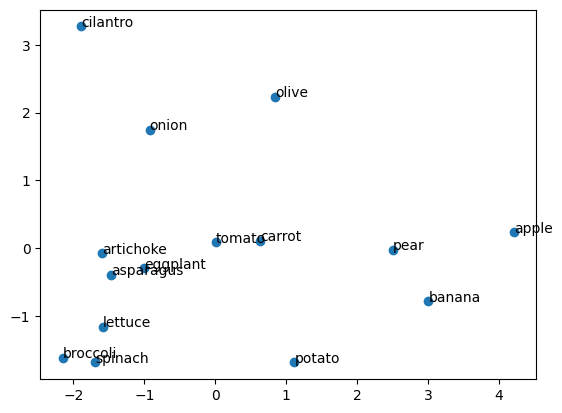

In [21]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=["apple", "banana", "pear", "broccoli", "carrot", "asparagus", "tomato", "potato", "eggplant", "olive", "spinach", "lettuce", "cilantro", "artichoke", "onion"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#It mostly makes sense, especially given that some of the plants are put together based on appearance or how they might be used in a dish. I'm also surprised at how accurately the fruits were differentiated from the vegetables, I expected it to group them much less accurately but it showed very good differentiation. 


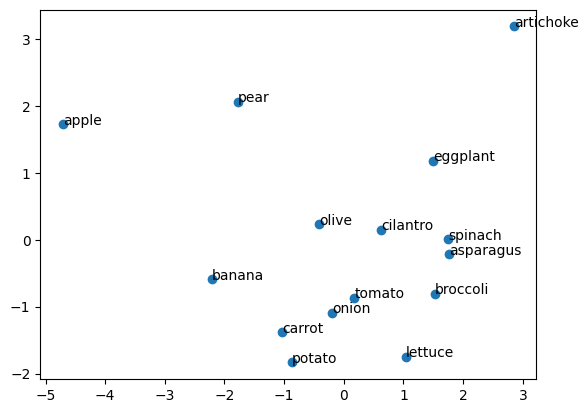

In [22]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

words=["apple", "banana", "pear", "broccoli", "carrot", "asparagus", "tomato", "potato", "eggplant", "olive", "spinach", "lettuce", "cilantro", "artichoke", "onion"]

X=[twitter_model[word] for word in words]


pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

#Almost completely flipped it, I'd say the vegetables are closer together now but the word apple might have been much further because people on Twitter are referring to it as the actual tech company and not just the fruit. The training data definitely focuses more on the individual items, knowing the context of Twitter it could be political or news related to vegetable quantity or the international farming market and such. 

Part 3: Embedding reddit posts

In [23]:
#read in uiuc csv
import pandas as pd 
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [24]:
#using the code from project 1, clean the text and create a bag of words representation of the text
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np


def clean(text):
    
    text = ' '.join(text.split())
   
    text = text.lower()
   
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])

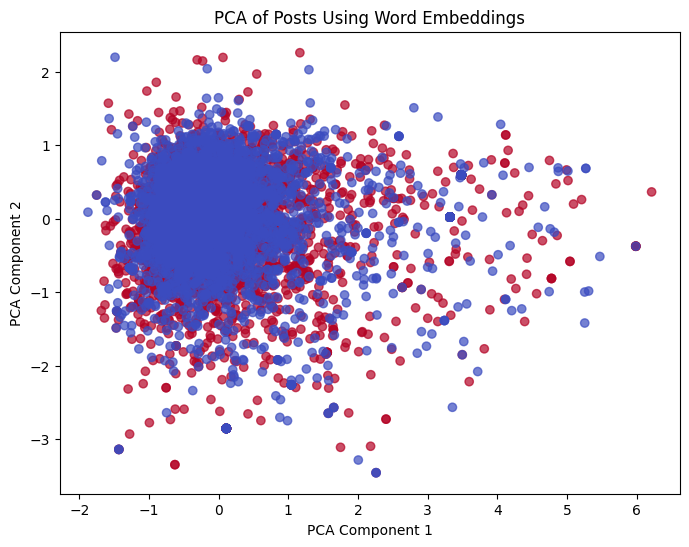

In [25]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

def get_embedding(post):
    words = post.split()  # Tokenize text
    word_vectors = [model[word] for word in words if word in model.key_to_index]
    
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Average vectors
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no words found

# Apply function to dataset
X_embeddings = np.array([get_embedding(post) for post in data['cleaned_text']])

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_embeddings)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.7)

plt.title("PCA of Posts Using Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#There honestly isn't a clear separation, it seems like the words are pretty common between the two different labels (UIUC and MICH), basically stating that the same embeddings are present despite which subreddit you look at. This makes sense, they're both subreddits about colleges so the posts will follow common themes and ideas.


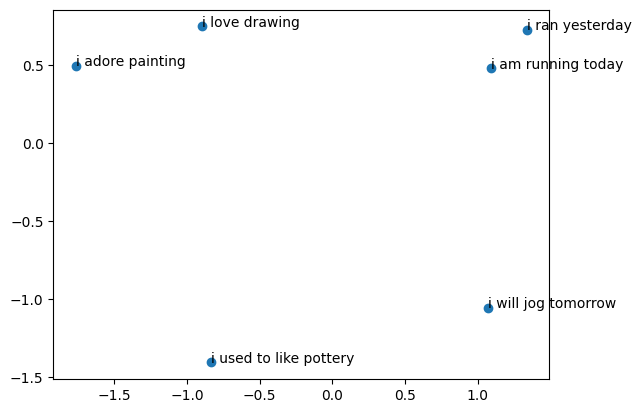

In [26]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

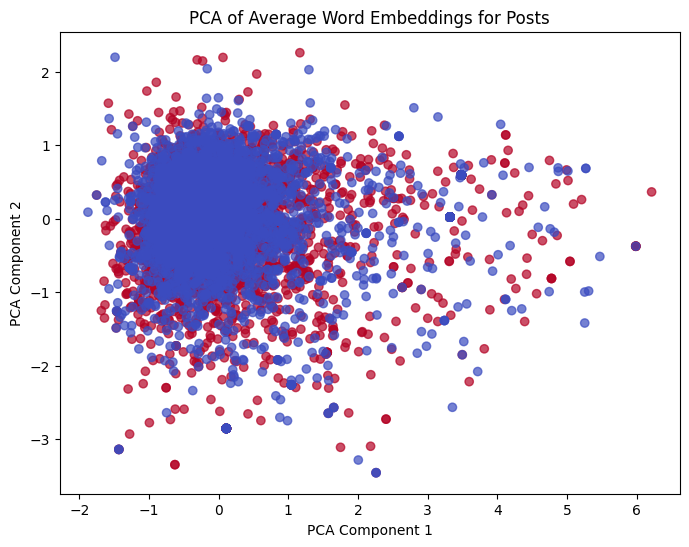

In [27]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

import numpy as np
import gensim.downloader
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load Word2Vec model
model = gensim.downloader.load("glove-wiki-gigaword-100")

# Your original function, slightly modified to avoid empty embeddings
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model.key_to_index]
    
    if embeddings:  # If there are valid word embeddings, take the mean
        return np.mean(embeddings, axis=0)
    else:  # If no valid embeddings, return a zero vector of the same size
        return np.zeros(model.vector_size)

# Compute average embeddings for each post
X_embeddings = np.array([avg_embedding(text, model) for text in data['cleaned_text']])

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_embeddings)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.7)

plt.title("PCA of Average Word Embeddings for Posts")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#The plot is honestly very similar, I don't see a huge amount of separation. It's different because this one looks at the difference between the average embeddings of each post. There again isn't a huge or very clear separation between the two subreddits, which is understandable it's based on two college subreddits. 


Part 4: HuggingFace and BERT

In [28]:
!pip install transformers


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\false\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
# Verify the installation:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\false\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu126


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cuda:0


In [30]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
from collections import Counter

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english",
    truncation=True,
    device=-1  # Forces execution on CPU
)
data["sentiment"] = data["cleaned_text"].apply(lambda x: sentiment_pipeline(x)[0]["label"])
most_common_sentiment = Counter(data["sentiment"]).most_common(1)[0]
print(f"Most common sentiment: {most_common_sentiment[0]} ({most_common_sentiment[1]} occurrences)")


Device set to use cpu


Most common sentiment: NEGATIVE (6282 occurrences)


In [44]:
#look at ten sample posts and labels; do you agree with all of them? 

top_10_sentiments = data['sentiment'].value_counts().head(10)
print(top_10_sentiments)
print(data[['cleaned_text', 'label']].sample(10))


#I don't necessarily agree that they are all negative, it seems like the random 10 I sampled were pretty normal. However, the sentiment seems to be much more negative than positive. 


sentiment
NEGATIVE    6282
POSITIVE    3168
Name: count, dtype: int64
                                           cleaned_text  label
3232  its not about protest its about posing a threa...      1
1040  id say you should get a car with some friends ...      1
4191  wanting to emphasize the fact that pirating re...      1
625                                             peetnis      1
7426                                        incoming dm      0
8281      maybe they found cheaper housing or something      0
4721  i went to one of the taylor nights was quite f...      1
8176  looks like ill be needing to find a new partne...      0
3198                              move in for the dorms      0
1339  it depends honestly if youd feel notice it wou...      1


In [ ]:
#is the UIUC or Michigan subreddit more negative?

In [45]:
#Michigan